# 03. Convolutional Neural Networks and Computer Vision with TensorFlow

## Importing Libraries

In [50]:
import os
os.environ['KERAS_BACKEND'] = 'tensorflow'
import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
from mlxtend.plotting import plot_decision_regions

In [2]:
print(keras.__version__)

3.10.0


## Loading the Dataset

In [3]:
import urllib.request

# Download zip file of pizza_steak images
url = "https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip"
urllib.request.urlretrieve(url, "pizza_steak.zip")

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
os.listdir("pizza_steak")

['test', 'train']

In [5]:
os.listdir("pizza_steak/train")

['steak', 'pizza']

In [6]:
os.listdir("pizza_steak/test")

['steak', 'pizza']

In [ ]:
len(os.listdir("pizza_steak/test/pizza"))

250

In [8]:
len(os.listdir("pizza_steak/test/steak"))

250

In [9]:
len(os.listdir("pizza_steak/train/pizza"))

750

In [10]:
len(os.listdir("pizza_steak/train/steak"))

750

In [11]:
print(os.walk("pizza_steak"))

<generator object walk at 0x7b5e067f9e70>


## Plot Image

In [12]:
import matplotlib.image as mpimg
import random
#Plot random image
def view_random_image(target_dir,target_class):
    target_folder = target_dir+target_class
    random_image = random.sample(os.listdir(target_folder),1)

    # plot image using plt
    image = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(image)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {image.shape}")
    return image

Image shape: (512, 512, 3)


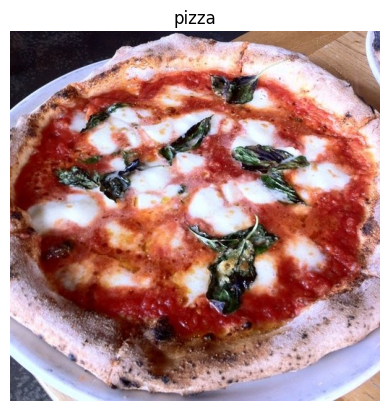

In [13]:
image = view_random_image(target_dir="pizza_steak/train/",target_class='pizza')

In [14]:
image.shape

(512, 512, 3)

In [15]:
image

array([[[ 38,  29,  34],
        [ 36,  27,  32],
        [ 29,  19,  27],
        ...,
        [ 96, 103, 149],
        [ 92, 100, 147],
        [ 75,  83, 130]],

       [[ 34,  25,  30],
        [ 33,  24,  29],
        [ 29,  19,  27],
        ...,
        [ 77,  84, 130],
        [108, 116, 163],
        [130, 138, 185]],

       [[ 29,  19,  27],
        [ 32,  22,  30],
        [ 33,  23,  31],
        ...,
        [ 69,  76, 122],
        [ 67,  75, 122],
        [101, 109, 156]],

       ...,

       [[ 92,  95, 110],
        [ 67,  70,  85],
        [ 58,  61,  76],
        ...,
        [203, 158, 125],
        [198, 153, 120],
        [190, 146, 111]],

       [[ 91,  94, 109],
        [ 64,  67,  82],
        [ 57,  60,  75],
        ...,
        [206, 161, 128],
        [202, 157, 124],
        [195, 150, 117]],

       [[ 85,  88, 103],
        [ 60,  63,  78],
        [ 58,  61,  76],
        ...,
        [207, 162, 131],
        [209, 164, 131],
        [204, 159, 126]]

In [16]:
image.ndim

3

In [17]:
image.max()

np.uint8(255)

In [18]:
image.min()

np.uint8(0)

In [19]:
type(image)

numpy.ndarray

## Model 1

In [24]:
from keras.utils import image_dataset_from_directory

In [25]:
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

In [27]:
train_data = image_dataset_from_directory(
    train_dir, label_mode='binary', batch_size=32, image_size=(224,224),
    seed=42
)

test_data = image_dataset_from_directory(
    test_dir, label_mode='binary', batch_size=32, image_size=(224,224),
    seed=42
)

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [28]:
normalization_layer = keras.layers.Rescaling(1./255)
train_data = train_data.map(lambda x, y: (normalization_layer(x), y))
test_data = test_data.map(lambda x, y: (normalization_layer(x), y))

In [35]:
type(train_data)


tensorflow.python.data.ops.map_op._MapDataset

In [46]:
# x,y from 1 batch
for x,y in train_data.take(1):
    print(x.shape)
    print(y.shape)
    print(tf.reduce_max(x))
    print(tf.reduce_min(x))

(32, 224, 224, 3)
(32, 1)
tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(0.0, shape=(), dtype=float32)


In [47]:
model_1 = keras.Sequential(
    [
        keras.layers.Input(shape=(224,224,3)),

        keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
        keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),

        keras.layers.MaxPooling2D(),

        keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),
        keras.layers.Conv2D(filters=10,kernel_size=3,activation='relu'),

        keras.layers.Flatten(),

        keras.layers.Dense(units=1, activation='sigmoid')
    ]
)

In [48]:
model_1.compile(
    loss=keras.losses.BinaryCrossentropy(),
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

In [49]:
history_1 = model_1.fit(
    train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data)
)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 160ms/step - accuracy: 0.6293 - loss: 0.7170 - val_accuracy: 0.7980 - val_loss: 0.4474
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.7958 - loss: 0.4568 - val_accuracy: 0.8560 - val_loss: 0.3674
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8391 - loss: 0.3874 - val_accuracy: 0.8280 - val_loss: 0.4006
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - accuracy: 0.8375 - loss: 0.3768 - val_accuracy: 0.8440 - val_loss: 0.3756
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 4s 88ms/step - accuracy: 0.8896 - loss: 0.2800 - val_accuracy: 0.8320 - val_loss: 0.3937


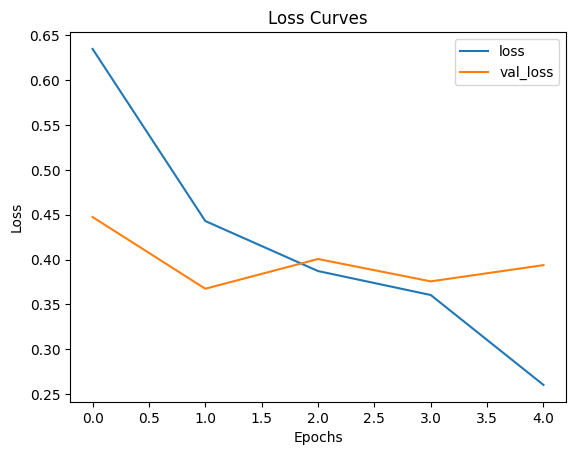

In [53]:
plt.plot(history_1.history['loss'], label='loss')
plt.plot(history_1.history['val_loss'], label='val_loss')
plt.title('Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

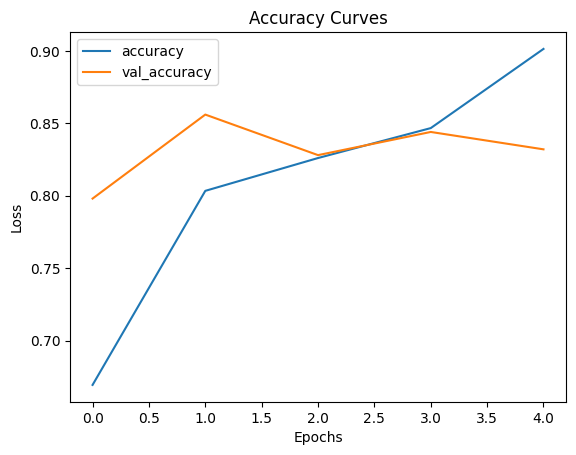

In [54]:
plt.plot(history_1.history['accuracy'], label='accuracy')
plt.plot(history_1.history['val_accuracy'], label='val_accuracy')
plt.title('Accuracy Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [55]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 112360)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │       112,361 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 346,115 (1.32 MB)

 Trainable params: 115,371 (450.67 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 230,744 (901.35 KB)